<a href="https://colab.research.google.com/github/PranavS71/Ibot-cv/blob/main/Task%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#installing orb
!pip install orb


  Preparing metadata (setup.py) ... done
  Created wheel for orb: filename=orb-0.9.4-py3-none-any.whl size=4892 sha256=5272a147601476d218506c6ee261d31eb7c16a11a0d3b66beef0df692d3216be
  Stored in directory: /root/.cache/pip/wheels/80/2f/0d/9b706957c4a81e91c27278d44fa19f2abd96fef6bfd0f13e4c
Successfully built orb


#Augmented Reality

In [15]:
def augment_func(img,sat_fact=0.8,contrast_fact=1.2,hue_shift=10.0):
  delu=img.copy()
  #rotation
  angle=np.random.randint(-180,180)
  center=(delu.shape[1]//2,delu.shape[0]//2)
  rotation_matrix=cv2.getRotationMatrix2D(center,angle,1.0)
  rotated=cv2.warpAffine(delu,rotation_matrix,(delu.shape[1],delu.shape[0]))
  rotated=cv2.cvtColor(rotated,cv2.COLOR_BGR2RGB)

  #saturated
  hsvil=cv2.cvtColor(delu,cv2.COLOR_BGR2HSV)
  hsvil[:,:,1]=np.clip(hsvil[:,:,1].astype('float32')*sat_fact,0,255).astype('uint8')

  #hue shift
  hsvir=cv2.cvtColor(delu,cv2.COLOR_BGR2HSV)
  hsvir[:,:,0]=np.clip(hsvir[:,:,0].astype('float32')+hue_shift,0,180).astype('uint8')

  #brightness
  bright=np.random.randint(10,50)
  brightened=np.clip(delu.astype(np.int16)+bright,0,255).astype('uint8')
  brightened=cv2.cvtColor(brightened,cv2.COLOR_BGR2RGB)

  #contrast
  contrasted=np.clip(128+(delu.astype('float32')-128)*contrast_fact,0,255).astype('uint8')
  contrasted=cv2.cvtColor(contrasted,cv2.COLOR_BGR2RGB)

  #shearing
  var=np.random.uniform(0.7,1.2)
  shear_matrix=np.float32(([1,var,0],[0,1,0]))
  sheared_image=cv2.warpAffine(delu,shear_matrix,(delu.shape[1],delu.shape[0]))
  sheared_image=cv2.cvtColor(sheared_image,cv2.COLOR_BGR2RGB)

  #getting the images
  return {"rotated": rotated,"saturated":cv2.cvtColor(hsvil,cv2.COLOR_HSV2RGB),"hue shifted":cv2.cvtColor(hsvir,cv2.COLOR_HSV2RGB),"brightened":brightened,"contrasted":contrasted,"sheared":sheared_image}

In [17]:
import os
from PIL import Image
#setting up the path
inp_dir="/content/"
ou_dir="augmented"
os.makedirs(ou_dir,exist_ok=True)
print(f"Checking for images in: {inp_dir}")
print(f"Files in {inp_dir}: {os.listdir(inp_dir)}")
#raeding the images
for img_name in os.listdir(inp_dir):
  # Check if the file is a common image format, ignoring directories and other files
  if img_name.lower().endswith(('.png', '.jpg', '.jpeg', '.gif')):
    img_path=os.path.join(inp_dir,img_name)
    img=cv2.imread(img_path)
    if img is None:
      print(f"Warning: Could not read image {img_name}")
      continue
    augmented_images=augment_func(img)

    #saving the augmented images
    for aug_name,aug_img in augmented_images.items():
      oup_path=os.path.join(ou_dir,f"{img_name.split('.')[0]}_{aug_name}.jpg")
      #using pil to save heh image as rgb itself
      Image.fromarray(aug_img).save(oup_path)


Checking for images in: /content/
Files in /content/: ['.config', 'bluimg1.jpeg', 'bluimg2.jpeg', 'blu.jpg', '.ipynb_checkpoints', 'augmented', 'sample_data']


# Image Matching

In [ ]:
img1=cv2.imread('bluimg1.jpeg')
img2=cv2.imread('bluimg2.jpeg')
img1.shape


(169, 328, 3)

Total Matches: 103
Good Matches: 51


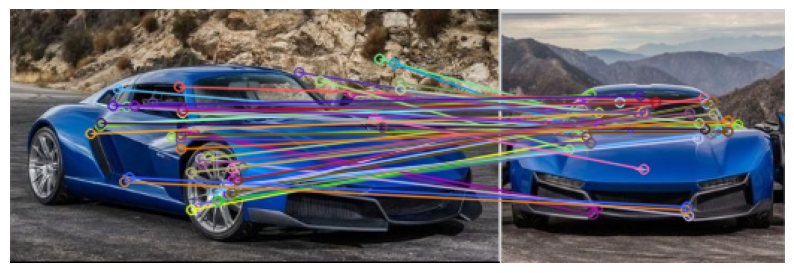

In [ ]:
#create orb orbject
orb=cv2.ORB_create()
#read images
img1=cv2.imread('bluimg1.jpeg')
img2=cv2.imread('bluimg2.jpeg')

#gray scale
gray1=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray2=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

#keys and descriptors
ks1,des1=orb.detectAndCompute(gray1,None)
ks2,des2=orb.detectAndCompute(gray2,None)

#getting the matching descriptions
mat=cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)
matches=mat.match(des1,des2)


#choosing the best decriptors
mindist=min( m.distance for m in matches)
good_matches=[m for m in matches if m.distance<=1.3*mindist]

print("Total Matches:",len(matches))
print("Good Matches:",len(good_matches))

matched_imag=cv2.drawMatches(img1,ks1,img2,ks2,good_matches,None,flags=2)
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(matched_imag,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
#image checker
def image_checker(img):
  if img is None:
    print("Image not found")
    return
  else:
    print("Image found")



Image found
Total no of detected circles: 16
Average radius: 37.75


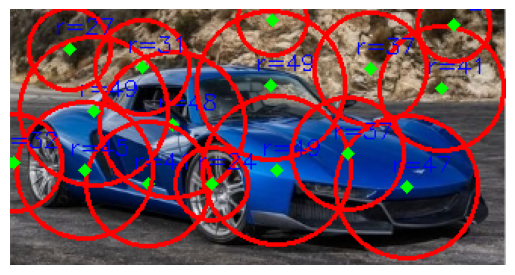

In [19]:
#loading image
im=cv2.imread("bluimg1.jpeg")
image_checker(im)
#converting to gray and blurred
grayed=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
blurred=cv2.GaussianBlur(grayed,(5,5),0) # Changed 'im' to 'grayed' here
#identifying the circles
circles=cv2.HoughCircles(blurred,cv2.HOUGH_GRADIENT,dp=1.2,minDist=40,param1=50,param2=30,minRadius=20,maxRadius=50)

res=im.copy()
cnt=0
rsum=0

if circles is not None:
  circles=np.uint16(np.around(circles))
  cnt=len(circles[0])
  for i in circles[0,:]:
    #circle
    cv2.circle(res,(i[0],i[1]),i[2],(0,0,255),2)
    #center
    cv2.circle(res,(i[0],i[1]),2,(0,255,0),3)
    #labeling with text
    cv2.putText(res,f"r={i[2]}",(int(i[0])-10,int(i[1])-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,0,0),1)
    #sum of radius
    rsum+=i[2]
else:
  print("No circles detected")

avg_radius=rsum/cnt
print("Total no of detected circles:",cnt)
print("Average radius:",avg_radius)
cv2.imwrite("Circled_image.png",cv2.cvtColor(res,cv2.COLOR_BGR2RGB))
plt.imshow(cv2.cvtColor(res,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

#Webcam Face and Smile detection

In [ ]:
#face detection for smile
def detect_smile():
  #dedcalring our face and smile identifier
  face_cascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
  smile_cascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_smile.xml')
  #getting the video
  inp=cv2.VideoCapture(0)
  cnt=0
  while True:
    ret,frame=inp.read()
    if not ret:
      break
    #reading the image to get more information
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray,1.1,4)
    smiles=smile_cascade.detectMultiScale(gray,1.1,3)
    if faces is None:
      print("No face detected")
      break
   #printing the result
    for (x,y,w,h) in faces:
      cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
      cv2.putText(frame,"Face",(x-5,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.9,(255,0,0),2)
    for(x,y,w,h) in smiles:
      cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
      cv2.putText(frame,"Smile",(x-5,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.9,(0,255,0),2)

  #showing the result
    cv2.imshow("Faces and Smiles",cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))
    cnt+=1
    if cv2.waitKey(1)==ord('q') or cnt>=100:
      break
  inp.release()
  cv2.destroyAllWindows()
